# Starbucks Customer Dataset

1. 데이터 불러오기 (데이터 개수, 구조, 기술통계)
2. 데이터 전처리 (중복치, 결측치, 이상치 처리)
3. 데이터 분석 (분포, 상관관계, 시각화)
4. 새로운 데이터 프레임 생성 (Merge)
4. 추정
5. 가설설정 및 검정
6. 회귀 분석

In [183]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [184]:
offer = pd.read_csv("portfolio.csv")
member = pd.read_csv("profile.csv")
transcript = pd.read_csv("transcript.csv")

4. For each of the csv file, these steps are followed
    * Reading the csv files, removing unnecessary columns, Data wrangling and Binning
    * Feature Engineering
    * Univariate Analysis
    * Bivariate Analysis
5.ML Models(work in progress)
6.Conclusion

### offer (portfolio.csv)   
#### 프로모션 관련 정보 
총 10개의 프로모션이 있고 7개의 컬럼으로 구성되어 있다

결측치 X

In [185]:
offer

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [186]:
offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


In [187]:
offer.describe()

,Unnamed: 0,reward,difficulty,duration
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,4.200000,7.700000,6.500000
std,3.02765,3.583915,5.831905,2.321398
min,0.00000,0.000000,0.000000,3.000000
25%,2.25000,2.000000,5.000000,5.000000
50%,4.50000,4.000000,8.500000,7.000000
75%,6.75000,5.000000,10.000000,7.000000
max,9.00000,10.000000,20.000000,10.000000


### member (profile.csv)
#### 가입한 고객 정보
17,000명의 고객들의 정보가 있고 6개의 컬럼으로 구성되어 있다

'gender'와 'income'에 결측치가 있다

In [188]:
member.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [189]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [190]:
member.describe()

,Unnamed: 0,age,became_member_on,income
count,17000.000000,17000.000000,1.700000e+04,14825.000000
mean,8499.500000,62.531412,2.016703e+07,65404.991568
std,4907.621624,26.738580,1.167750e+04,21598.299410
min,0.000000,18.000000,2.013073e+07,30000.000000
25%,4249.750000,45.000000,2.016053e+07,49000.000000
50%,8499.500000,58.000000,2.017080e+07,64000.000000
75%,12749.250000,73.000000,2.017123e+07,80000.000000
max,16999.000000,118.000000,2.018073e+07,120000.000000


**'gender'에 결측치와 'O' 라는 데이터가 존재한다.**

In [191]:
member['gender'].unique()

array([nan, 'F', 'M', 'O'], dtype=object)

In [192]:
member['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

**'age'에 최대값 118이 이상치로 보인다.**

### transcript (transcrip.csv)
#### 프로모션에 참여한 실제 유저들의 응답 정보
총 306534의 응답 정보가 있고 5개의 컬럼으로 구성되어 있다

결측치 X

In [193]:
transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [194]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [195]:
transcript.describe()

,Unnamed: 0,time
count,306534.000000,306534.000000
mean,153266.500000,366.382940
std,88488.888045,200.326314
min,0.000000,0.000000
25%,76633.250000,186.000000
50%,153266.500000,408.000000
75%,229899.750000,528.000000
max,306533.000000,714.000000


**'event'에 네가지 종류의 데이터가 있다.**

In [196]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [197]:
transcript[transcript['event'] == 'offer received'].head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [198]:
transcript[transcript['event'] == 'offer viewed'].head()

,Unnamed: 0,person,event,value,time
12650,12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
12651,12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
12652,12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
12653,12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
12655,12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0


In [199]:
transcript[transcript['event'] == 'transaction'].head()

,Unnamed: 0,person,event,value,time
12654,12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0


In [200]:
transcript[transcript['event'] == 'offer completed'].head()

,Unnamed: 0,person,event,value,time
12658,12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0


**'person'은 고객 식별번호, 'value'는 프로모션 식별번호이다. column명을 변경하고, 'value'에서 프로모션 식별번호만 추출한다.**

**'time'은 프로모션을 시작했을 때부터 걸린 시간**

## 데이터 전처리

In [201]:
member.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [202]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


### 중복치 처리

In [203]:
offer[offer.duplicated()]

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id


In [204]:
member[member.duplicated()]

,Unnamed: 0,gender,age,id,became_member_on,income


In [205]:
transcript[transcript.duplicated()]

,Unnamed: 0,person,event,value,time


In [206]:
transcript = transcript.drop_duplicates()
transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


### 'Unnamed: 0' 컬럼은 필요 없는 컬럼이므로 삭제한다

In [207]:
offer.drop('Unnamed: 0', axis=1, inplace=True)
member.drop('Unnamed: 0', axis=1, inplace=True)
transcript.drop('Unnamed: 0', axis=1, inplace=True)

### 결측치 처리
'gender'와 'income'은 중앙값/평균값으로 입력하기 어려운 데이터이다 -> dropna

In [208]:
member[member.isna().any(axis=1)]

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [209]:
member = member.dropna()
member

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


### 이상치 처리
Boxplot

'age'의 이상치로 보였던 118은 결측치를 처리하면서 없어졌고 boxplot 결과 101세는 이상치가 아님   

'became_member_on'의 boxplot으로 보면 2013, 2014년의 값들이 이상치로 나타난다. 이 당시에 많은 데이터가 수집되지 못해 그런 것이 정상 데이터로 간주하고 넘어간다.

'income'은 이상치가 존재 하지 않는다

In [210]:
member

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [211]:
member.describe()

,age,became_member_on,income
count,14825.000000,1.482500e+04,14825.000000
mean,54.393524,2.016689e+07,65404.991568
std,17.383705,1.188565e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


<Axes: >

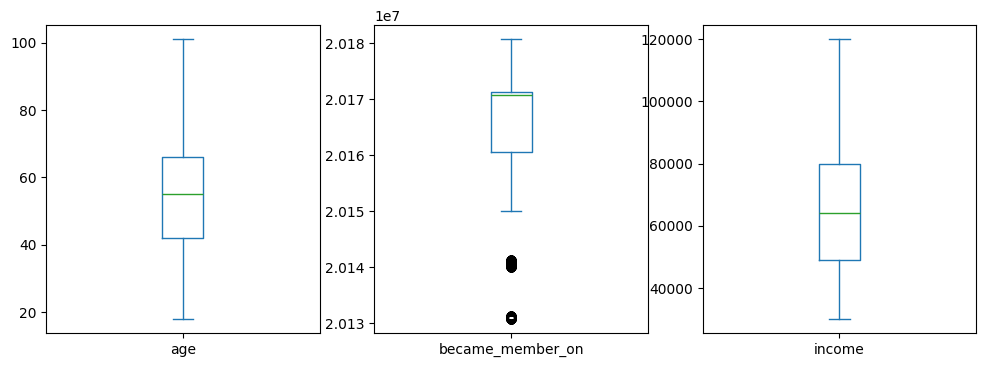

In [212]:
fig, axes = plt.subplots(ncols = 3, figsize=(12,4))

member['age'].plot(kind='box', ax=axes[0])
member['became_member_on'].plot(kind='box',  ax=axes[1])
member['income'].plot(kind='box',  ax=axes[2])

In [213]:
member[member['became_member_on'] < 20150000]

,gender,age,id,became_member_on,income
14,M,26,e12aeaf2d47d42479ea1c4ac3d8286c6,20140213,46000.0
16,M,49,62cf5e10845442329191fc246e7bcea3,20141113,52000.0
24,M,42,f806632c011441378d4646567f357a21,20130811,69000.0
30,M,67,5917d13f6fa04286abdf95f4d5cefb1e,20140823,96000.0
37,M,56,8dabe2142cdf4013a6f4786edf8ab00f,20140511,68000.0
...,...,...,...,...,...
16896,F,74,c95e4b6a0e874a8488624f8f8da3a369,20140327,99000.0
16900,M,38,2ce987015ec0404a97ba333e8e814090,20130808,61000.0
16914,M,87,d1c4500ace2e45e9a45d3cd2fccac8d8,20140920,59000.0
16921,M,43,2993452c14c14cc5abad4702764fe403,20141027,58000.0


### 데이터 타입 변경
'became_member_on' 값을 datetime type으로 변경한다 

In [214]:
member['became_member_on'] = member['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [215]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


In [216]:
member.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


### 데이터 변경

- 이름 변경

1. offer['id'] -> offer['offer_id']
3. member['id'] -> member['member_id']
4. transcript['person'] -> transcript['member_id']
5. transcript['time'] -> transcript['hours_since_start]
6. transcript['value'] -> transcript['dict_key'] / transcript['dict_value']
7. member['became_member_on] -> member['join_date']
- 정렬

1. offer - offer_type, difficulty 내림차순 정렬

#### 이름 변경

In [217]:
offer = offer.rename(columns={'id':'offer_id'})
offer

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [218]:
member = member.rename(columns={'id':'member_id'})
member

,gender,age,member_id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [219]:
transcript = transcript.rename(columns={'person':'member_id'})
transcript = transcript.rename(columns={'time':'hours_since_start'})
transcript

,member_id,event,value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [220]:
# value 딕셔너리로 변경
value_column_to_dict = transcript['value'].apply(eval)
value_column_to_dict.head()

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
Name: value, dtype: object

In [221]:
# 키 추출
dict_key_column = [list(d.keys())[0] for d in value_column_to_dict]

# 값 추출
dict_value_column = [list(d.values())[0] for d in value_column_to_dict]

# 'value' 데이너 split
value_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_split['dict_key'] = dict_key_column
value_split['dict_value'] = dict_value_column

value_split.head()

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5
3,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0


In [222]:
# 데이터 교체하기
# value 컬럼 삭제하기
transcript = transcript.drop('value', axis=1)
transcript

,member_id,event,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0
2,e2127556f4f64592b11af22de27a7932,offer received,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0
...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714
306531,a00058cf10334a308c68e7631c529907,transaction,714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714


In [223]:
transcript = pd.concat([transcript, value_split], axis=1)
transcript

,member_id,event,hours_since_start,dict_key,dict_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53


In [224]:
member = member.rename(columns={'became_member_on':'join_date'})
offer

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


#### 정렬

In [225]:
offer = offer.sort_values(['offer_type', 'difficulty']).reset_index(drop=True)
offer

,reward,channels,difficulty,duration,offer_type,offer_id
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837


In [226]:
offer['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

In [227]:
offer['offer_alias'] = offer['offer_type'].str[0].str.upper() + (offer.groupby('offer_type').cumcount() + 1).astype(str)
offer

,reward,channels,difficulty,duration,offer_type,offer_id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,B1
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B2
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,B3
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,B4
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,D1
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,D2
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,D3
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,D4
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I1
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,I2


## 변수 분석

### 단일 변수 분석

#### Gender
고객의 성별 분포는 **남성(M) 57.2% > 여성(F) 41.3% > 기타(O) 1.4%** 이다


In [228]:
gender = member['gender']

In [229]:
gender.value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

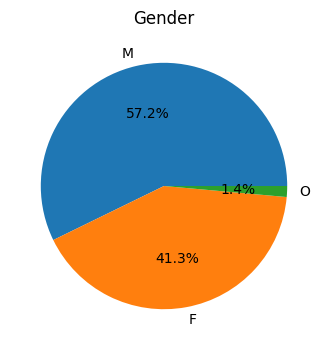

In [230]:
# Pie Plot

plt.figure(figsize=(4,4))
plt.pie(x=gender.value_counts(), labels=gender.value_counts().keys(), autopct = '%1.1f%%')
plt.title('Gender')
plt.show();

#### Age
정규분포보다는 살짝 왼쪽으로 치우쳐 있다. -> 비교적 낮은 연령대의 고객들이 많다

**최연소: 18세, 최고령: 101세, 중간값: 55세**

**평균값: 54.39, 표준편차: 17.38**

**50대 > 60대 > 40대> 70대 > 30대 > 20대 > 80대 > 90대> 10대> 100대** 순으로 고객 수가 분포되어 있다



In [231]:
age = member['age']

In [232]:
age.describe()

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

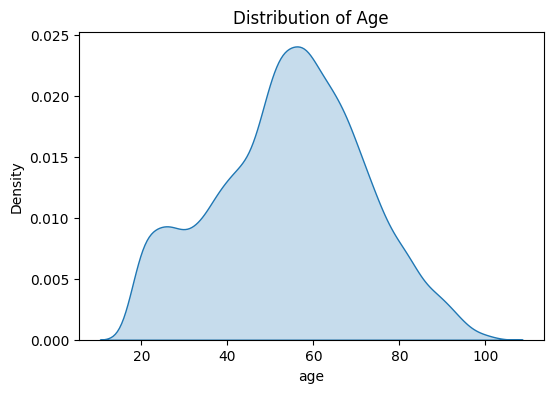

In [233]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=member, x='age', fill=True)
plt.title('Distribution of Age')
plt.show()

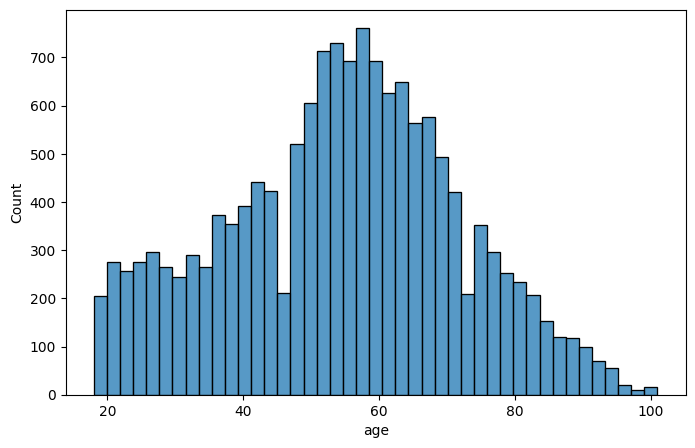

In [234]:
plt.figure(figsize=(8,5))
sns.histplot(data=member, x='age')
plt.show()

In [235]:
# 연령별 그룹 나누기
# 10대 부터 10살 단위로 나누기

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']

member['age_group'] = pd.cut(age, bins=bins, labels=labels, right=False)
member['age_group']

1        50s
3        70s
5        60s
8        60s
12       50s
        ... 
16995    40s
16996    60s
16997    40s
16998    80s
16999    60s
Name: age_group, Length: 14825, dtype: category
Categories (10, object): ['10s' < '20s' < '30s' < '40s' ... '70s' < '80s' < '90s' < '100s']

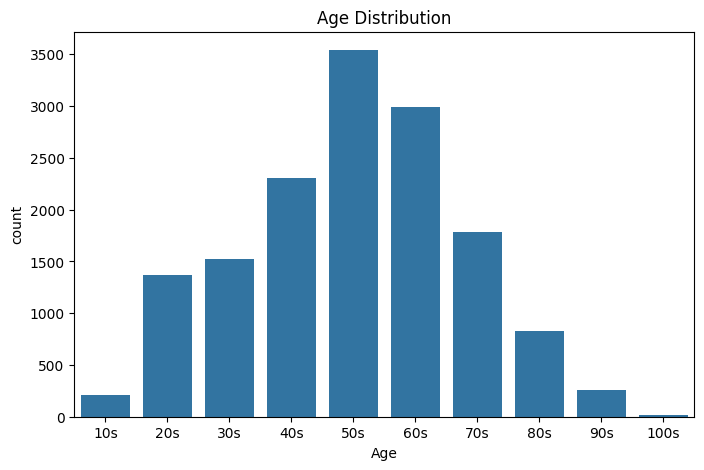

In [236]:
plt.figure(figsize=(8,5))
sns.countplot( data=member, x='age_group')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

#### Income
정규분포보다는 살짝 왼쪽으로 치우쳐 있다. -> 비교적 낮은 소득의 고객들이 많다

**소득 범위: 30,000 ~ 120,000**   

**평균 소득: 65,405**   

**소득 중간값: 64,000**   

**45k~60k > 60k~75k > 30k~45k > 75k~90k > 90~105k > 105k~ 순으로 고객 분포가 되어 있다**

In [237]:
income = member['income']

In [238]:
income.describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

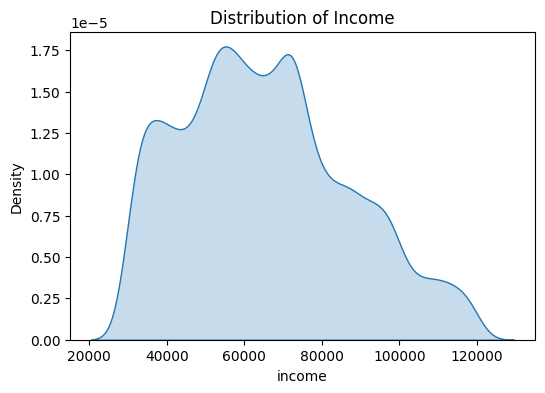

In [239]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=member, x='income', fill=True)
plt.title('Distribution of Income')
plt.show()

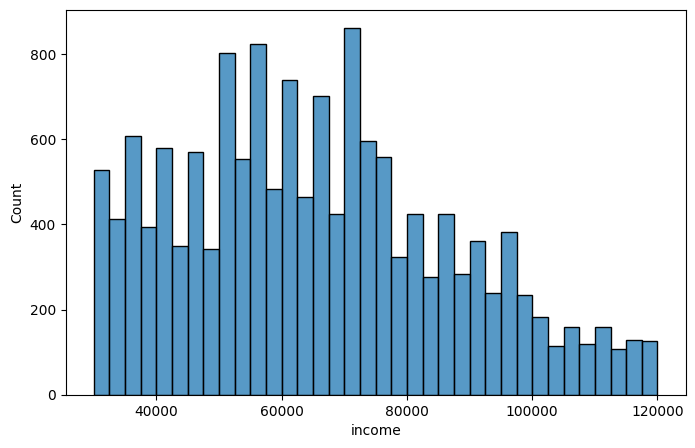

In [240]:
plt.figure(figsize=(8,5))
sns.histplot(data=member, x='income')
plt.show()

In [241]:
# 소득별 그룹 나누기
# 15,000 단위로 그룹 나누기 

bins = [income.min(), income.min() + 15000, income.min() + 30000, income.min() + 45000, income.min() + 60000, income.min() + 75000, income.max()]
labels = ['30k~45k', '45k~60k', '60k~75k', '75k~90k', '90k~105k', '105k~']

member['income_group'] = pd.cut(income, bins=bins, labels=labels, right=False)
member['income_group']

1           105k~
3        90k~105k
5         60k~75k
8         45k~60k
12        45k~60k
           ...   
16995     45k~60k
16996     60k~75k
16997     60k~75k
16998     45k~60k
16999     75k~90k
Name: income_group, Length: 14825, dtype: category
Categories (6, object): ['30k~45k' < '45k~60k' < '60k~75k' < '75k~90k' < '90k~105k' < '105k~']

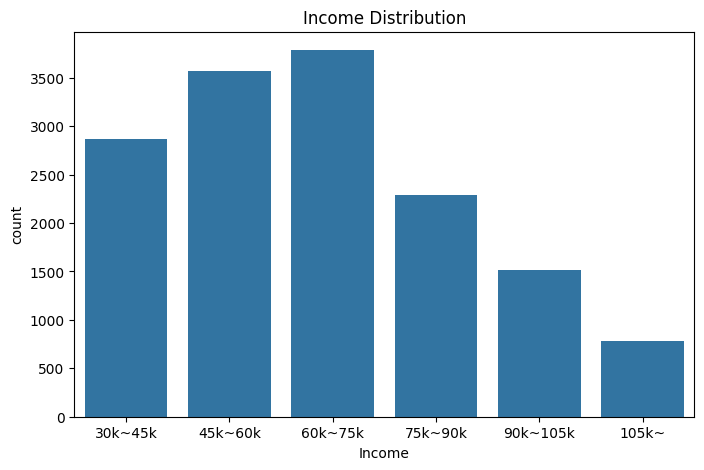

In [242]:
plt.figure(figsize=(8,5))
sns.countplot( data=member, x='income_group')
plt.xlabel('Income')
plt.title('Income Distribution')
plt.show()

#### Join date	

In [243]:
membership_join = member[['member_id', 'join_date']]
membership_join = membership_join.assign(year = member['join_date'].dt.year,
                                        month = member['join_date'].dt.month,
                                        day = member['join_date'].dt.day,
                                        month_name = member['join_date'].dt.month_name(),
                                        day_of_week = member['join_date'].dt.day_of_week,
                                        day_name = member['join_date'].dt.day_name()
                                        )
membership_join = membership_join.sort_values('join_date')
membership_join

,member_id,join_date,year,month,day,month_name,day_of_week,day_name
8948,77388a70eaf14433b4efc5d01fa947bf,2013-07-29,2013,7,29,July,0,Monday
1200,5ffdab087e674149a89324a732b4f993,2013-07-30,2013,7,30,July,1,Tuesday
7796,d25f38519a89455499c9e49e67ae1511,2013-07-30,2013,7,30,July,1,Tuesday
569,dbb4766b7dd94ca2b83a855312a3ebe9,2013-07-30,2013,7,30,July,1,Tuesday
10933,7b42b5bbe237406aaf2748a09050f745,2013-07-31,2013,7,31,July,2,Wednesday
...,...,...,...,...,...,...,...,...
6524,c3ea4f8ef00d4ec99de9df2de9b4e794,2018-07-26,2018,7,26,July,3,Thursday
11008,1bb6878ed4ed4e5e804829102ad73113,2018-07-26,2018,7,26,July,3,Thursday
8152,fb75504a0e404549995a3e8427a2a252,2018-07-26,2018,7,26,July,3,Thursday
13249,42f00b6b150e45149c50db9bd642bca6,2018-07-26,2018,7,26,July,3,Thursday


#### The number of members

**2013년**부터 **2018년**까지의 데이터이다. 가입자수가 **2017년까지 증가했다가 2018년에 감소**했다.

**8월부터 1월까지** 가입자수가 비교적 많은 편이다

요일별 가입자수는 그렇게 큰 차이가 있어보이진 않지만 비교적 주말에 많은 편이고 금요일에 가장 적다

**2015년 8월**과 **2017년 8월**에 가입량이 급증하고, **2018년 2월**에 가입량이 살짝 감소했다.

2018년에 가입자수가 적어진 이유는 2018년 7월까지의 데이터뿐이라 그런 것 같다.

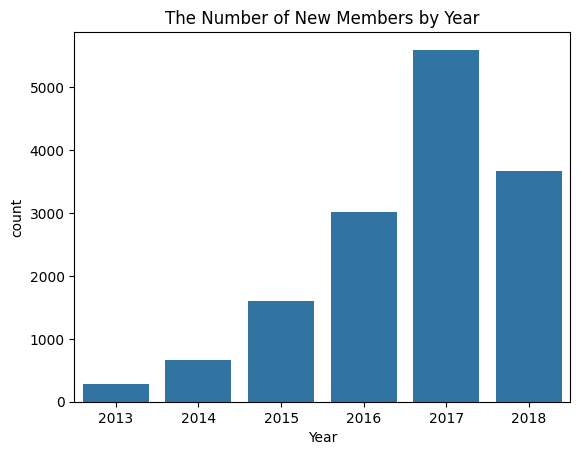

In [244]:
# 연도별 멤버십 가입 고객 증가 추이
sns.countplot(data = membership_join, x='year')
plt.xlabel('Year')
plt.title('The Number of New Members by Year')
plt.show()

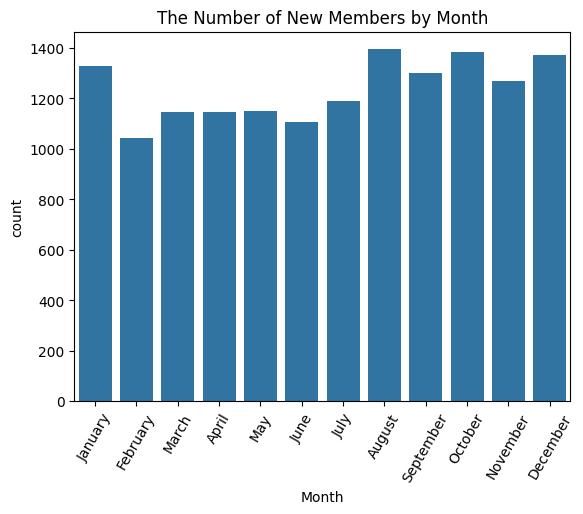

In [245]:
# 월별 멤버십 가입 고객 증가 추이
sns.countplot(data = membership_join.sort_values('month'), x='month_name')
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.title('The Number of New Members by Month')
plt.show()

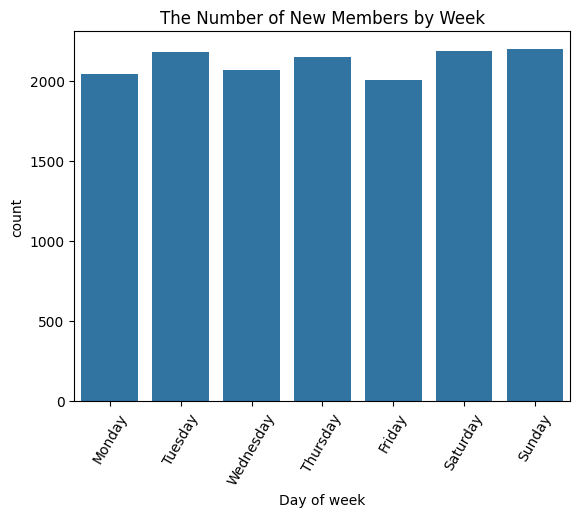

In [246]:
# 월별 멤버십 가입 고객 증가 추이
sns.countplot(data = membership_join.sort_values('day_of_week'), x='day_name')
plt.xticks(rotation=60)
plt.xlabel('Day of week')
plt.title('The Number of New Members by Week')
plt.show()

In [247]:
# 일자별 멤버십 가입 고객 증가 추이
daily_count = membership_join.value_counts('join_date').sort_index().reset_index()
daily_count['year-month'] = daily_count['join_date'].dt.to_period('M').astype(str)
daily_count


,join_date,count,year-month
0,2013-07-29,1,2013-07
1,2013-07-30,3,2013-07
2,2013-07-31,1,2013-07
3,2013-08-01,1,2013-08
4,2013-08-02,2,2013-08
...,...,...,...
1702,2018-07-22,22,2018-07
1703,2018-07-23,8,2018-07
1704,2018-07-24,17,2018-07
1705,2018-07-25,15,2018-07


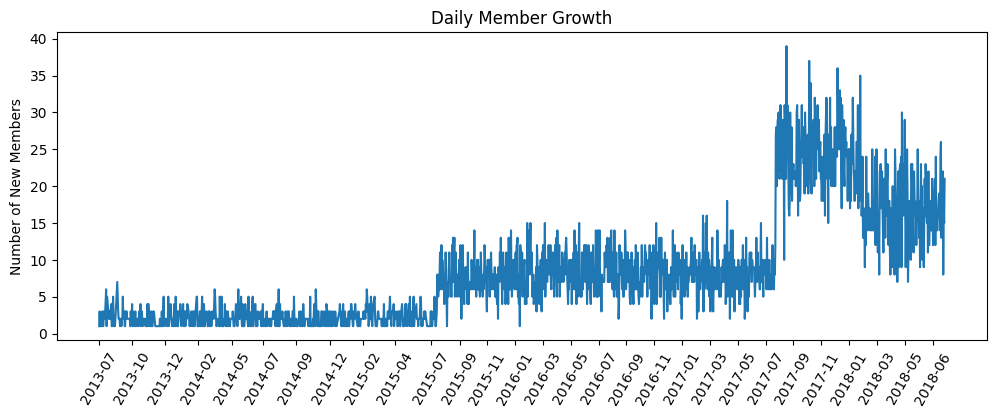

In [248]:
plt.figure(figsize=(12,4))
plt.plot(daily_count['join_date'], daily_count['count'])
plt.ylabel('Number of New Members')
plt.xticks(daily_count['join_date'][::60], daily_count['year-month'][::60], rotation=60);
plt.title('Daily Member Growth')
plt.show()

### 다변량 변수 분석

#### Age / Gender
여성, 남성, 기타 성별의 나이 데이터는 정규분포를 따르는 편이다 -> 남여 모두 전 연령이 스타벅스를 이용한다

**여성** 고객의 평균 연령은 **57.5세**, **남성** 고객의 평균 연령은 **52.1세**, **기타** 성별 고객의 평균 연령은 **54.4세**이다.

전체 고객의 평균연령은 **54.4세**로 여성고객들의 평균은 전체 평균보다 높고, 남성고객들은 전체 평균보다 낮다.

남성 고객 중 연령대가 낮은 고객의 비율이 여성 고객보다 크다.

In [249]:
print(member.groupby('gender').agg({'age':'mean'}).round(1))
print('the average age of all customers:', member['age'].mean().round(1))

         age
gender      
F       57.5
M       52.1
O       54.4
the average age of all customers: 54.4


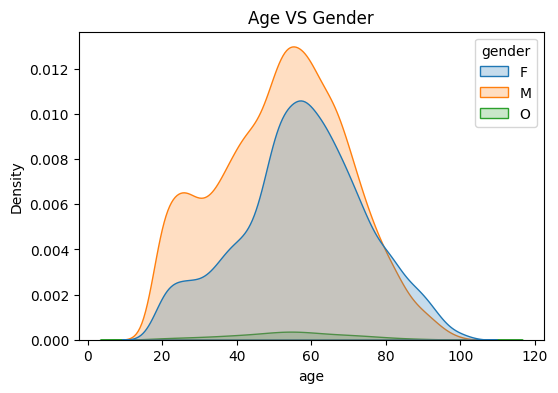

In [250]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=member, x='age', hue='gender', fill=True)
plt.title('Age VS Gender')
plt.show()

#### Income / Gender
**여성** 고객의 평균 소득은 **71306.4 USD**, **남성** 고객의 평균 연령은 **61194.6 USD**, **기타** 성별 고객의 평균 연령은 **63287.7 USD**이다.

전체 고객의 평균연령은 **65405 USD**로 여성고객들의 평균은 전체 평균보다 높고, 남성고객들의 평균은 전체 평균보다 낮다.

여성 고객의 소득 데이터는 정규분포를 따른다. -> 여성고객들은 전체 소득 범위의 고객들이 스타벅스를 이용한다.

남성 고객의 소득 데이터는 낮은소득으로 치우쳐 있다. -> 남성고객들은 비교적 낮은 소득 범위의 고객들이 스타벅스를 이용한다.

In [251]:
print(member.groupby('gender').agg({'income':'mean'}).round(1))
print('the average income of all customers:', member['income'].mean().round(1))

         income
gender         
F       71306.4
M       61194.6
O       63287.7
the average income of all customers: 65405.0


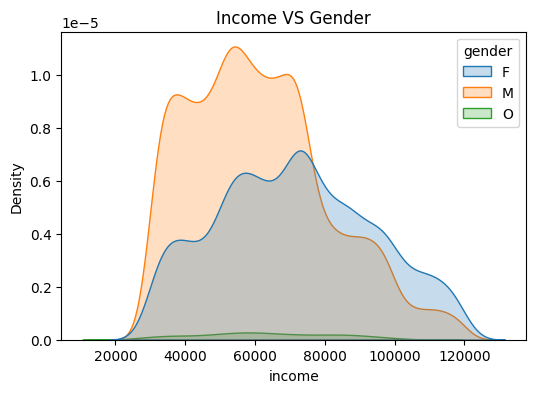

In [252]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=member, x='income', hue='gender', fill=True)
plt.title('Income VS Gender')
plt.show()

#### Income / Age
10 ~ 30대는 5만 달러대의 소득, 40대는 6만 달러대, 50대 이상은 7만 달러대의 연간 평균 소득을 가지고 있다.

평균적으로 연령이 더 많은 고객들은 더 높은 소득을 가지고 있다

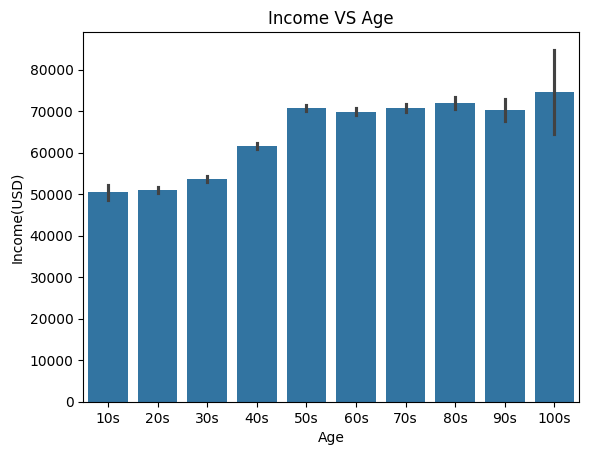

In [253]:
sns.barplot(data=member, x='age_group', y='income')
plt.xlabel('Age')
plt.ylabel('Income(USD)')
plt.title('Income VS Age')
plt.show()

## EDA

### Offer data
#### Pairplot + Regplot (reward, difficulty, duration) 
'bogo' 제공은 2건, 'discount' 제공은 4건, 'informational' 제공은 2건이 있다.'

'informational'은 reward와 difficulty가 0이다.

1. reward: bogo > discount 
2. reward VS difficulty: 뚜렷한 상관관계가 없다.
3. difficulty: discount > bogo -> bogo는 discount보다 더 높은 difficulty를 가지지만 reward는 낮다.
4. reward VS duration: 음의 상관관계를 가진다.
5. difficulty VS duration: 양의 상관관계를 가진다.
6. duration: dicount > bogo > informational 순으로 긴 기간을 가진다. 

In [254]:
offer

,reward,channels,difficulty,duration,offer_type,offer_id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,B1
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B2
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,B3
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,B4
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,D1
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,D2
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,D3
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,D4
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I1
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,I2


<Figure size 1200x800 with 0 Axes>

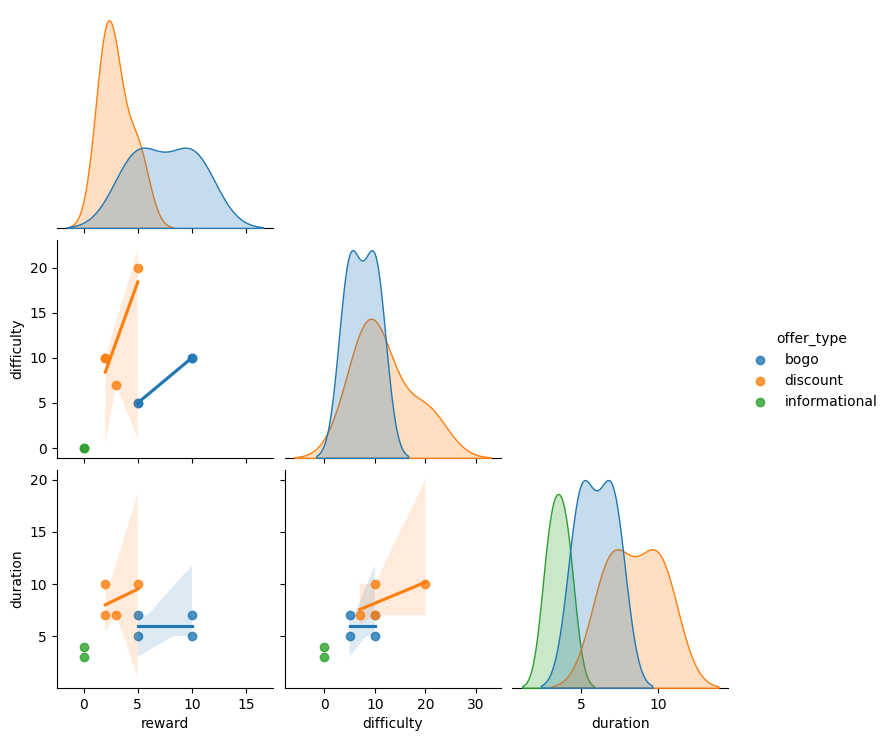

In [255]:
plt.figure(figsize=(12,8));
sns.pairplot(data=offer, hue='offer_type', kind='reg', corner=True);
plt.show();

<Axes: xlabel='reward', ylabel='difficulty'>

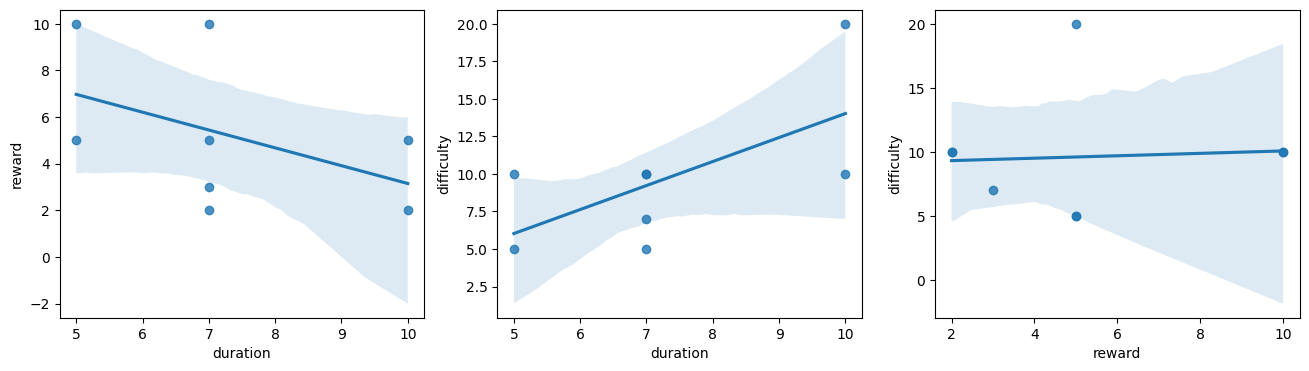

In [256]:
# informationl을 제외한 offer 에서의 'duration', 'reward', 'difficulty' 간의 상관관계 확인

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
sns.regplot(data=offer[offer['offer_type'] != 'informational'], x='duration', y='reward', ax=axes[0])
sns.regplot(data=offer[offer['offer_type'] != 'informational'], x='duration', y='difficulty', ax=axes[1])
sns.regplot(data=offer[offer['offer_type'] != 'informational'], x='reward', y='difficulty', ax=axes[2])

### Transcript data

In [257]:
transcript

,member_id,event,hours_since_start,dict_key,dict_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53


#### Event

##### Proportion

138,953건의 transaction, 76,277건의 offer received, 57,725건의 offer viewed, 그리고 33,579건의 offer completed가 있다.

대략 14만건의 거래가 있었고 그 중 54.9%만이 offer를 받았다.

offer를 받은 사람 중 offer를 확인한 사람은 75.7%이고, 완료까지 한 사람은 44%이다.

offer를 확인한 사람 중 offer를 완료한 사람은 58.2%이다.

offer와 관계 없이 고객의 충성도가 높고, offer를 받은 고객 중 offer를 완료까지 한 비율이 꽤나 높은 걸 보니 정기고객이 꽤 많은 것으로 보인다.

In [258]:
transcript['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [259]:
print("전체 거래에 대한 offer 수신 비율:",round(76277 / 138953 * 100, 1), "%")
print("offer 수신 비율에 대한 offer 확인 비율:",round(57725 / 76277 * 100, 1), "%")
print("offer 수신 비율에 대한 offer 완료 비율:",round(33579 / 76277 * 100, 1), "%")
print("offer 확인 비율에 대한 offer 완료 비율:",round(33579 / 57725 * 100, 1), "%")

전체 거래에 대한 offer 수신 비율: 54.9 %
offer 수신 비율에 대한 offer 확인 비율: 75.7 %
offer 수신 비율에 대한 offer 완료 비율: 44.0 %
offer 확인 비율에 대한 offer 완료 비율: 58.2 %


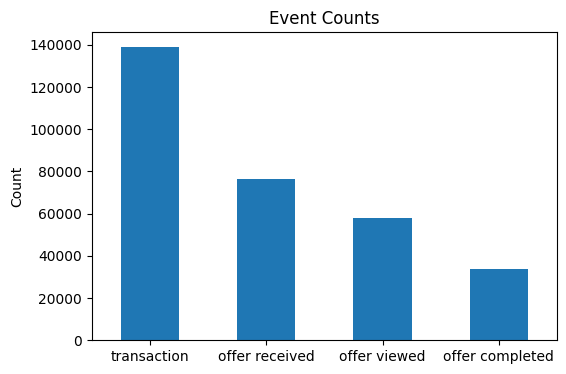

In [260]:
plt.figure(figsize=(6,4))
transcript['event'].value_counts().plot(kind='bar')
plt.xticks(rotation=None)
plt.ylabel('Count')
plt.xlabel(None)
plt.title('Event Counts')
plt.show()

##### Hours since Start

1. offer를 확인('offer viewed')하는 것과 offer를 완료('offer completed')하는 고객의 수가 급증하는 간격과 날짜가 일치한다. -> 둘의 상관관계는 매우 높다.

2. 거래('transaction')도 증가하는 간격은 같지만 날짜는 두 항목보다 이틀 후에 발생한다. -> 상관관계가 높다.

3. 효과는 짧지만 'offer viewed'의 효과는 명백히 존재한다.

In [261]:
transcript

,member_id,event,hours_since_start,dict_key,dict_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53


In [262]:
transcript['days_since_start'] = transcript['hours_since_start'] / 24
transcript['days_since_start'] = transcript['days_since_start'].astype(int)
transcript

,member_id,event,hours_since_start,dict_key,dict_value,days_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59,29
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53,29
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61,29
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53,29


In [263]:
days_by_event = transcript.groupby(['event', 'days_since_start'])['member_id'].count().reset_index()
days_by_event

,event,days_since_start,member_id
0,offer completed,0,1014
1,offer completed,1,1025
2,offer completed,2,848
3,offer completed,3,655
4,offer completed,4,480
...,...,...,...
91,transaction,25,5866
92,transaction,26,5510
93,transaction,27,5044
94,transaction,28,4529


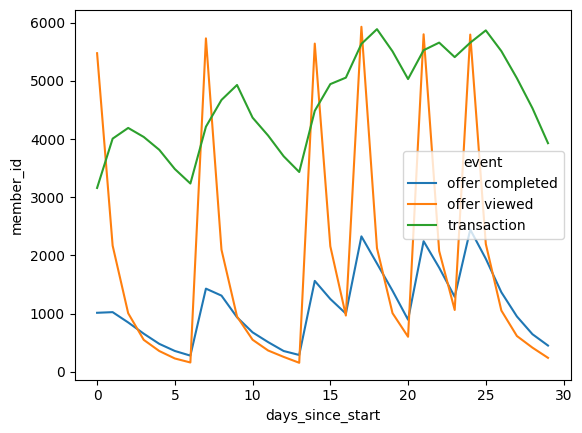

In [264]:
sns.lineplot(data=days_by_event[days_by_event['event'] != 'offer received'], x='days_since_start', y='member_id', hue='event');

## 심슨의 역설 - X
전체 성별에 대한 age와 income 회귀선과 성별에 따른 회귀선의 모습이 일치한다   
-> 심슨의 역설이 없는 데이터이다

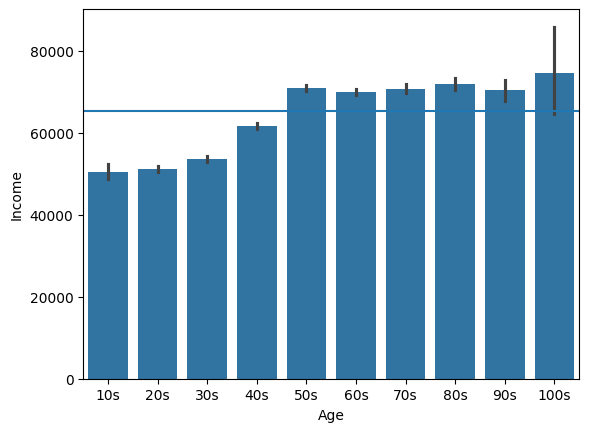

In [265]:
# 연령대별 평균 소득 시각화

sns.barplot(data=member, x='age_group', y='income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.axhline(member['income'].mean())

<Axes: xlabel='age', ylabel='income'>

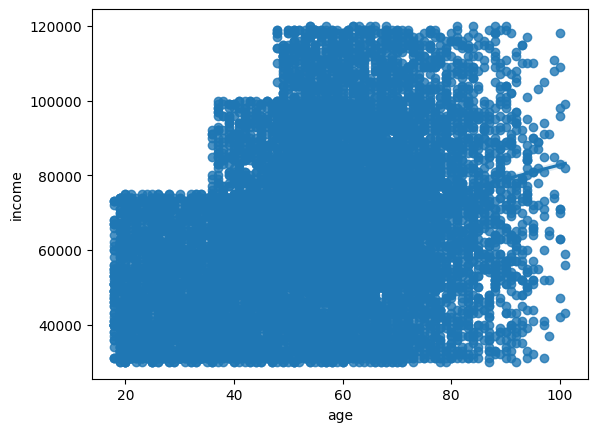

In [266]:
# 전체 변수 시각화
sns.regplot(data=member, x='age', y='income')

In [267]:
# 전체 변수와 개별 변수 합쳐서 시각화 하기

genders_all = member.copy()
genders_all['gender'] = 'All'
genders_all = pd.concat([genders_all, member])
genders_all['gender'].value_counts()

gender
All    14825
M       8484
F       6129
O        212
Name: count, dtype: int64

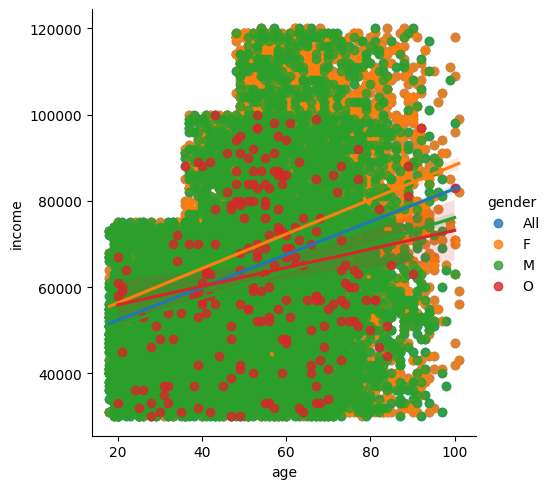

In [268]:
# 개별 변수의 회귀선 시각화
sns.lmplot(data=genders_all, x='age', y='income', hue='gender')

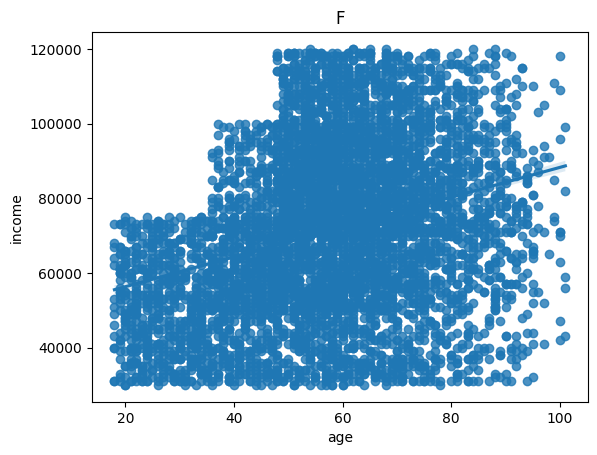

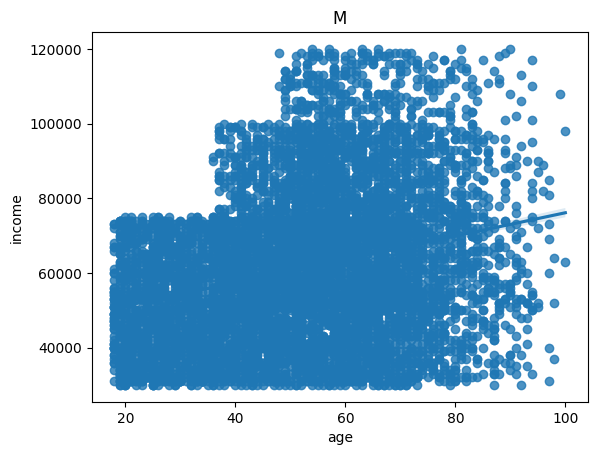

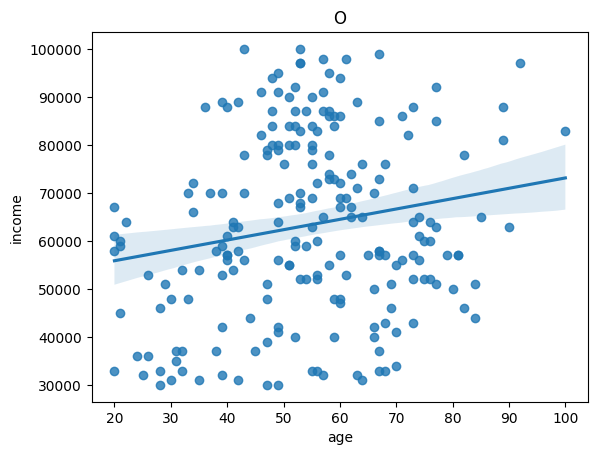

In [269]:
for gender in ['F', 'M', 'O']:
    sns.regplot(data=genders_all[genders_all['gender']==gender], x='age', y='income').set(title=gender)
    plt.show()

## Age와 Income의 관계 분석

**1. 회귀계수**

const (상수항): 4.468e+04로 표시되며, 이는 회귀식의 y 절편에 해당한다. 즉, age가 0일 때 income의 예상 값은 4.468e+04이다.

age: 381.0614로 표시되며, 이는 age의 계수이다. age가 1 증가할 때마다 income이 381.0614만큼 증가한다는 것을 의미한다.

통계적 유의성: P>|t| (P-value): const와 age의 P-value는 둘 다 0.000으로 나타난다. 이는 두 계수가 통계적으로 유의미하다는 것을 의미한다.

모델 적합성: F-statistic: 1539.0으로 표시되며, 모델 전체의 적합도를 평가하는데 사용된다. 높은 F-statistic 값은 모델이 데이터에 잘 적합되었음을 나타낸다.


**2. 가설검정**

귀무가설 기각, 대립가설 채택 ->  Age와 Income은 상관 관계가 있다다


**3. 결정계수**

이 모델에서는 R-squared가 0.094로 나타나 있으며, 이는 모델이 종속 변수의 9.4%의 변동을 설명한다는 것을 의미한다.   

낮은 결정계수는 모델이 데이터를 잘 설명하지 못한다는 것을 나타낼 수 있다.


**4. 결과 전체 해석**

이 모델은 통계적으로 유의미하지만, 결정계수가 낮아 데이터를 적절히 설명하지 못할 수 있다.




In [270]:
import statsmodels.api as sm

In [271]:
# 독립변수: age / 종속변수: income
X = member['age']
y = member['income']
X_ols = sm.add_constant(X) # 상수항 추가

In [272]:
# Statsmodels를 사용한 단순 회귀 모델 훈련
model_ols = sm.OLS(y, X_ols).fit()
model_ols

In [273]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1539.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          2.23e-320
Time:                        23:32:52   Log-Likelihood:            -1.6826e+05
No. Observations:               14825   AIC:                         3.365e+05
Df Residuals:                   14823   BIC:                         3.365e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.468e+04    554.653     80.551      0.0

## Age, Gender와 Income의 관계 분석

**1. 회귀계수**

Intercept (절편): 5.142e+04로 표시되며, 이는 회귀식의 y 절편에 해당한다. gender와 age가 모두 0일 때 income의 예상 값은 5.142e+04이다.

gender[T.M]: -8236.0776로 표시되며, 이는 남성의 추가 수입을 나타낸다. 여기서는 여성을 기준으로 하고 있으므로, 남성이 여성보다 8236.0776만큼 수입이 낮다는 것을 의미한다.

gender[T.O]: -6932.2660으로 표시되며, 이는 기타(gender가 'O'인 경우)의 추가 수입을 나타낸다. 여성을 기준으로 하고 있으므로, 기타(gender가 'O')의 수입이 여성보다 6932.2660만큼 낮다는 것을 의미한다.

age: 345.5496로 표시되며, 이는 age의 계수이다. age가 1 증가할 때마다 income이 345.5496만큼 증가한다는 것을 의미한다.

통계적 유의성: P>|t| (P-value): 모든 계수의 P-value가 0.000으로 나타난다. 이는 모든 계수가 통계적으로 유의미하다는 것을 의미한다.

모델 적합성: F-statistic: 727.1로 표시되며, 모델 전체의 적합도를 평가하는데 사용된다. 높은 F-statistic 값은 모델이 데이터에 잘 적합되었음을 나타낸다.

**2. 가설 검정**

귀무가설 기각, 대립가설 채택 -> Age, Gender는 Income과 상관관계가 있다

**3. 결정계수**

이 모델에서는 R-squared가 0.128로 나타나 있으며, 이는 모델이 종속 변수의 12.8%의 변동을 설명한다는 것을 의미한다. 

age만으로 관계분석을 했을 때보다 높은 결정계수를 가지고 있지만 여전히 낮은 결정계수를 갖고 있다.


**4. 결과 전체 해석**

이 모델 또한 통계적으로 유의미하지만, 결정계수가 여전히 낮아 데이터를 적절히 설명하지 못할 수 있다.


In [274]:
import statsmodels.formula.api as smf

In [275]:
# 독립변수: Age, Gender / 종속변수: Income

formula = 'income ~ age + gender'
model_multi = smf.ols(formula=formula, data=member).fit()

In [276]:
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     727.1
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:32:52   Log-Likelihood:            -1.6798e+05
No. Observations:               14825   AIC:                         3.360e+05
Df Residuals:                   14821   BIC:                         3.360e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.142e+04    611.732     84.059      

## 로지스틱 회귀 .. Continued..

### 고객 세분화

offer 종류에 따라 세분화해야 할 거 같다

### 인기 있는 제안
기준: 확인율과 완료율이 높은 제안

In [277]:
# event가 transaction이 아닌 행 수집
trans_offer = transcript[transcript['event'] != 'transaction']
trans_offer

,member_id,event,hours_since_start,dict_key,dict_value,days_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,0
...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,714,offer_id,2298d6c36e964ae4a3e7e9706d1fb8c2,29
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4,29
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,29
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4,29


In [278]:
offer

,reward,channels,difficulty,duration,offer_type,offer_id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,B1
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B2
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,B3
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,B4
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,D1
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,D2
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,D3
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,D4
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I1
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,I2


In [279]:
event_offer = pd.merge(trans_offer, offer, left_on = 'dict_value', right_on='offer_id').drop(['dict_key', 'offer_id', 'dict_value'], axis=1)
event_offer.head()

,member_id,event,hours_since_start,days_since_start,reward,channels,difficulty,duration,offer_type,offer_alias
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,5,"['web', 'email', 'mobile']",5,7,bogo,B1
1,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,0,5,"['web', 'email', 'mobile']",5,7,bogo,B1
2,f082d80f0aac47a99173ba8ef8fc1909,offer received,0,0,5,"['web', 'email', 'mobile']",5,7,bogo,B1
3,c0d210398dee4a0895b24444a5fcd1d2,offer received,0,0,5,"['web', 'email', 'mobile']",5,7,bogo,B1
4,57dd18ec5ddc46828afb81ec5977bef2,offer received,0,0,5,"['web', 'email', 'mobile']",5,7,bogo,B1


In [280]:
offer_received = event_offer[event_offer['event'] == 'offer received']
p_received = offer_received.value_counts('offer_alias').sort_values(ascending=False)

In [281]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
p_viewed = offer_viewed.value_counts('offer_alias').sort_values(ascending=False)

In [282]:
offer_completed = event_offer[event_offer['event'] == 'offer completed']
p_completed = offer_completed.value_counts('offer_alias').sort_values(ascending=False)

In [283]:
view_receive_rate = (p_viewed.sort_index() /  p_received.sort_index()).sort_values(ascending=False)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix